# Polynomial Regression on Car Age vs Car Price

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("../datasets/Car_Age_Price.csv")
df.head()

,Car_Age,Car_Price
0,1,20000
1,2,18000
2,3,15000
3,4,12000
4,5,10000


In [3]:
#check for missing data
df.isnull().sum()

Car_Age      0
Car_Price    0
dtype: int64

In [4]:
# Step 2: Prepare the data
X = df[['Car_Age']]  # Independent variable (Car_Age)
y = df['Car_Price']  # Dependent variable (Car_Price)

In [5]:
X.shape

(100, 1)

In [6]:
y.shape

(100,)

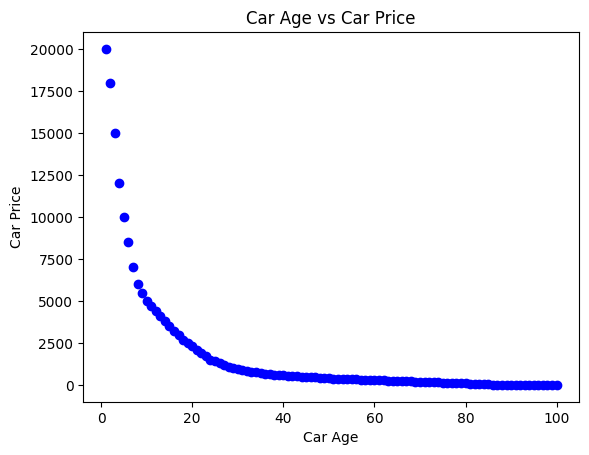

In [7]:
# Step 3: Visualize the data to check the relationship between variables
plt.scatter(X, y, color='blue')
plt.title('Car Age vs Car Price')
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.show()

In [8]:
# pply Polynomial Features to capture the non-linear relationship
poly = PolynomialFeatures(degree=4)  
X_poly = poly.fit_transform(X)

In [9]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=2
)

In [10]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape off X_test: {X_test.shape}")

Shape of X_train: (80, 5)
Shape off X_test: (20, 5)


In [11]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape off y_test: {y_test.shape}")

Shape of y_train: (80,)
Shape off y_test: (20,)


In [12]:
#Fit a Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
#Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 Score: 0.921779685946913
Mean Squared Error: 2318393.1836999482


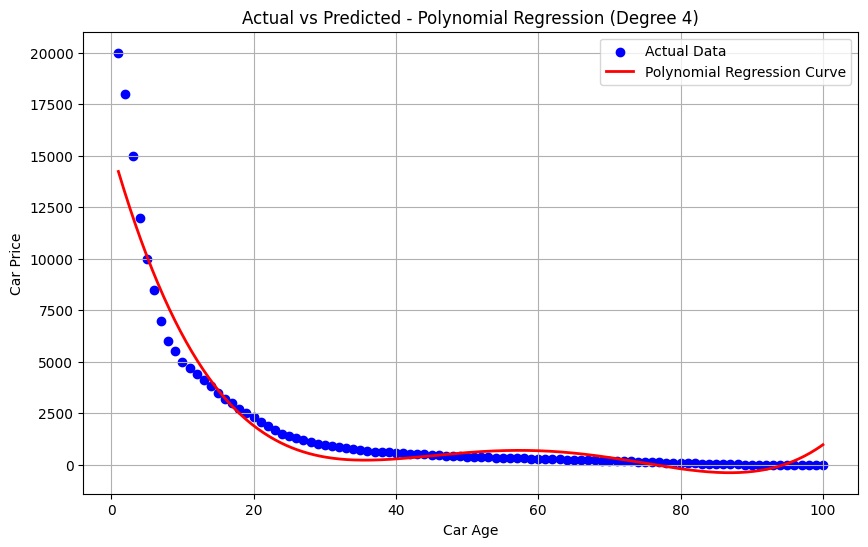

In [ ]:
# Generate points for a smooth curve
X_curve = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_curve_poly = poly.fit_transform(X_curve)
y_curve_pred = model.predict(X_curve_poly)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_curve, y_curve_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('Actual vs Predicted - Polynomial Regression (Degree 4)')
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.legend()
plt.grid(True)
plt.show()


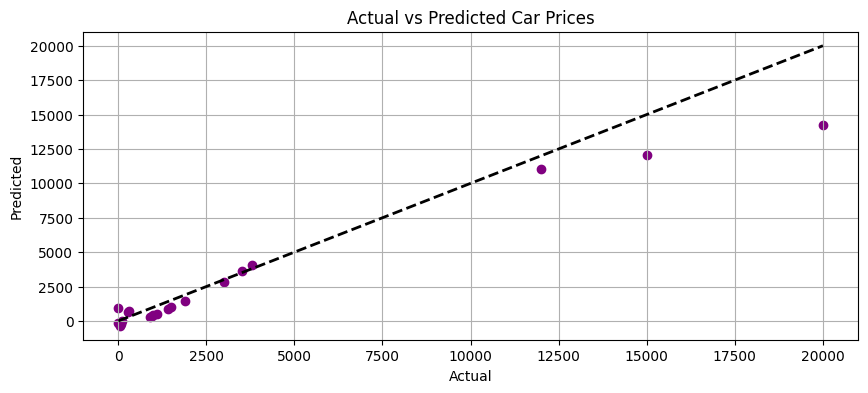

In [16]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()
